# IOT & COMPUTER VISION Internship

# AUTHOR : Yash Joshi

# TASK 1: Object Detection using YOLO and OpenCV 

# GRIP@SPARK FOUNDATION

#

#

#


## What is YOLO? 


### YOLO algorithem is an algorithem based on regression,It exapnds as You Only Look Once, Instead of selecting the interesting part of an image predicts classes and bounding boxes for the whole image in one run of the algorithm.

#

#

# 


### So let's get started 

#### Importing all packages that is being used for object detection such as Matplotlib which is a plotting library for the Python.
#### Numpy for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
#### OpenCV, It is a huge open-source library for computer vision, machine learning, and image processing.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#

#

#

### ** So the first thing we do is to read the image using open CV and plot using the following command.


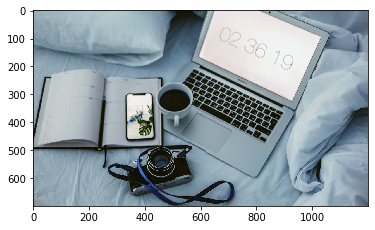

In [2]:
image= cv2.imread("./pexels.jpeg")  # As image is in same file path we don't require to add path of the image.
plt.imshow(image)

#

#

#

 
### ** As we see output from the last command It shows or reads the image in BRG format so we need to convert it into the RGB and than we are going to plot   it.  


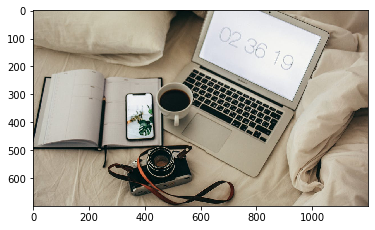

In [3]:
new_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(new_image)

#

#

#

## Below written line reads the weights and config file and creates the network.

In [4]:
yolo=cv2.dnn.readNet("yolov3.weights","yolov3.cfg")

#

#

#

## Now we are going to use coco file for Naming the class of the object 

In [5]:
classes=[]   #creating list of Classes

with open("./coco.names",'r') as f:
    classes=f.read().splitlines()
    
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

#

#

#

## Below line prepares the input image to run through the deep neural network.

In [6]:
img= cv2.imread("./pexels.jpeg")
blob=cv2.dnn.blobFromImage(img,1/255,(320,320),(0,0,0),swapRB=True,crop=False)

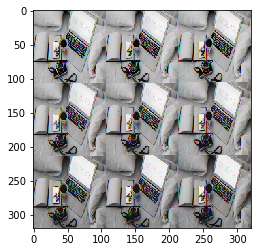

In [7]:
blob.shape


x= blob[0].reshape(320,320,3)
plt.imshow(x)

In [8]:
yolo.setInput(blob)  #setting the blob as input

#

#

#

## Below line draws rectangle over the given predicted region and writes class name over the box. And this will be our output.

In [9]:
output_layers_name=yolo.getUnconnectedOutLayersNames()
layeroutput=yolo.forward(output_layers_name)
height, width, channels = img.shape

#

#

#

### Now we need to find where we need to put our boxes or where the objects are so that we will define the list and according to the condition we will append the list. 

In [10]:
boxes=[]
confidences=[]
class_ids=[]

for output in layeroutput:
    for detection in output:
        
        score=detection[5:]
        class_id=np.argmax(score)
        confidence=score[class_id]
        
        if confidence>=0.5:
            
            
            center_x=int(detection[0]*width)
            center_y=int(detection[1]*height)
            w=int(detection[2]*width)
            h=int(detection[3]*height)
            
            
            x=int(center_x-w/2)
            y=int(center_y-h/2)
            
                
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            

In [11]:
len(boxes)

8

#

#

#

## Now we have to add this bonding boxes to our Images Using this below function 

In [12]:
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

#

#

#

## For font type and colors  

In [13]:
font= cv2.FONT_HERSHEY_PLAIN
colors=np.random.uniform(0,255,size=(len(boxes),3))

#

#

#

## For each and evry object over there, We will add bounding boxes to this.

In [14]:
for i in indexes.flatten():
    x,y,w,h=boxes[i]
    
    labels=str(classes[class_ids[i]])
    confie=str(round(confidences[i],4))
    color=colors[i]
    
    cv2.rectangle(img,(x,y),(x+w,y+h),color,4)
    cv2.putText(img, labels+" "+confie,(x,y+50),font,4,(255,255,255),3)

#

#

#

# Finally we are going to detect objects of the image and for ploting that 

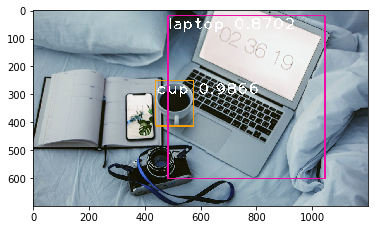

In [15]:
plt.imshow(img)

In [16]:
cv2.imwrite("./Detected.jpg",img)

True